In [2]:
import pandas as pd
import numpy as np
import datetime
import json 
import json
import pandas as pd
import matplotlib.pyplot as plt
import io, base64
from IPython.display import display_html
from docx.shared import Cm
from docxtpl import DocxTemplate, InlineImage
from docx.shared import Cm, Inches, Mm, Emu



df=pd.read_excel("Moshesh Perfomance.xlsm", sheet_name='Data')
df.head()
df['Verg_PRP50']=df['Verg_PRP50']*100
df['Mid_PRP50']=df['Mid_PRP50']*100
df['Dur_PRP50']=df['Dur_PRP50']*100
df['Her_PRP50']=df['Her_PRP50']*100
df['Hig_PRP50']=df['Hig_PRP50']*100

df.sort_values(by="Date",ascending=True)


month=str(datetime.datetime.now().month-1)

#df.describe()
df=df[(df['Date'] >= '2021-01-01') & (df['Date'] <= '2022-0'+month+'-01')]
df['Date'].dt.strftime('%Y') 

df['Date'] = df['Date'].dt.strftime('%b %Y')
#df.info()
df


,Date,Verg_Energy_(kWh),Verg_PR_(%),Verg_Irradiated_(kWh/m²),Verg_Availability_(%),Verg_P50_(kWh),Verg_estimatedPOA,Verg_PRP50,Mid_(kWh)2,Mid_PR_(%),...,Measure_Durb_%PR,Measure_Mid_PR_%,Measure_Her_PR%,Measure_HIG_PR_%,Measure-_Availability_Guaranteed,Ver_ Availability,Mid_Availability,Dur_Availability,Hig_Availability,Her_ Availability
0,Oct 2021,15875.7,0.000000,0.000000,15.83,106909.00,192.8,0.00,4349.600,0.000000,...,0.00,0.00,0.00,NaN,95,98,98,98,98,98
1,Nov 2021,114666.8,0.000000,0.000000,92.20,124191.30,227.7,0.00,18453.800,0.000000,...,0.00,0.00,0.00,NaN,95,98,98,98,98,98
2,Dec 2021,126249.6,0.000000,0.000000,100.00,135649.00,252.1,0.00,48330.803,0.000000,...,0.00,0.00,0.00,NaN,95,98,98,98,98,98
3,Jan 2022,127624.6,NaN,0.000000,98.83,134331.04,250.6,76.90,34169.195,0.000000,...,75.64,76.51,84.70,NaN,95,98,98,98,98,98
4,Feb 2022,96946.4,0.000000,0.000000,99.29,108571.18,201.5,77.29,32936.602,0.000000,...,76.04,77.93,84.90,NaN,95,98,98,98,98,98
5,Mar 2022,94648.1,82.452705,38.207514,100.00,100729.11,185.2,78.02,29032.300,86.957433,...,76.14,78.72,85.06,NaN,95,98,98,98,98,98
6,Apr 2022,70139.1,73.310869,121.692362,96.83,70910.55,127.1,80.03,23635.797,81.264061,...,77.67,79.90,86.03,NaN,95,98,98,98,98,98
7,May 2022,52487.9,77.960922,92.269062,99.26,51576.41,90.9,81.39,23406.500,74.747981,...,79.51,81.40,86.55,NaN,95,98,98,98,98,98
8,Jun 2022,39237.9,68.443102,82.067254,92.02,41981.69,73.4,82.05,21763.203,77.946521,...,80.42,82.20,86.62,NaN,95,98,98,98,98,98
9,Jul 2022,42440.4,71.948243,82.514290,91.65,47500.46,82.6,82.49,20957.109,73.192121,...,80.47,82.11,87.17,NaN,95,98,98,98,98,98


# Mediclinic Vergelegen Production

In [3]:
def save_img_tag(fig=None, format='png', alt="image", bbox_inches='tight'):
    if fig is None:
        fig = plt.gcf()
    
    # Save data to BytesIO stream
    data = io.BytesIO();
    plt.savefig(data, format=format, bbox_inches=bbox_inches);
    data.seek(0)
    
    # Encode in base64
    data64 = base64.b64encode(data.read())
    
    # Convert to <img> tag with URI
    uri = 'data:image/png;base64,' + (data64.decode())
    img_tag = '<img alt="{}" src = "{}" />'.format(alt, uri)
    
    return img_tag

In [116]:
  
irradiation = df.pivot_table(df[['Verg_Irradiated_(kWh/m²)','Verg_estimatedPOA']], #selecting columns
               index = 'Date', #selecting index
               aggfunc = np.sum, dr).sort_values(by=['Verg_Energy_(kWh)','Verg_P50_(kWh)'],ascending=False) #selectin


SyntaxError: positional argument follows keyword argument (3539823825.py, line 3)

In [117]:
production = df.pivot_table(df[['Verg_Energy_(kWh)','Verg_Energy_(kWh)']], #selecting columns
               index = 'Date', #selecting index
               aggfunc = np.sum, dropna=True,margin=True )

production



TypeError: pivot_table() got an unexpected keyword argument 'margin'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              11 non-null     object 
 1   Verg_Energy_(kWh)                 11 non-null     float64
 2   Verg_PR_(%)                       10 non-null     float64
 3   Verg_Irradiated_(kWh/m²)          11 non-null     float64
 4   Verg_Availability_(%)             11 non-null     float64
 5   Verg_P50_(kWh)                    11 non-null     float64
 6   Verg_estimatedPOA                 11 non-null     float64
 7   Verg_PRP50                        11 non-null     float64
 8   Mid_(kWh)2                        11 non-null     float64
 9   Mid_PR_(%)                        11 non-null     float64
 10  Mid_Irradiated_(kWh/m²)           11 non-null     float64
 11  Mid_Availability_(%)              11 non-null     float64
 12  Mid_P50_(k

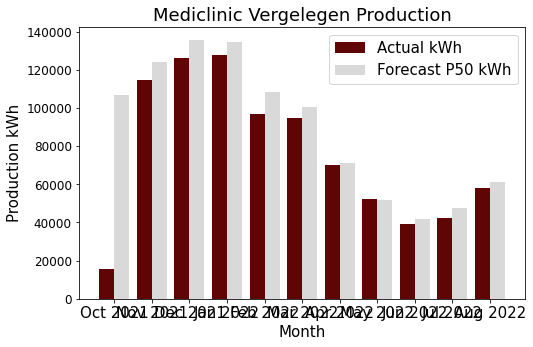

In [127]:

# Define Data

    
def production (name,actual,forecast,x,y ):
    figname='Mediclinic ' +name+' Production.jpg'
    team = df['Date']
    female = df[actual]
    male = df[forecast ]
    x_axis = np.arange(len(team))
    plt.clf()
    plt.bar(x_axis -0.2, female, width=0.4, label = 'Actual kWh', color= '#5F0505')
    plt.bar(x_axis +0.2, male, width=0.4, label = 'Forecast P50 kWh', color= '#D9D9D9')
    # Xticks
    plt.xticks(x_axis, team)
    # Add labels
    plt.xlabel("Month")
    plt.ylabel ("Production kWh", )
    plt.legend(loc='upper right')
    plt.title('Mediclinic ' +name+' Production') # Display
    #plt.rcParams.update({'font.size':15})
    #plt.rcParams["figure.figsize"] = (x,y)
    plt.savefig(figname, dpi=500)
    return figname
    
def irradiation (name,actual,forecast, x, y):
    plt.clf()
    team = df['Date']
    female = df[actual]
    male = df[forecast ]
    figname='Mediclinic ' +name+' Irradiation.jpg'
    x_axis = np.arange(len(team))
    plt.clf()
    plt.bar(x_axis -0.2, female, width=0.4, label = 'Actual  kWh/m²', color= '#5F0505')
    plt.bar(x_axis +0.2, male, width=0.4, label = 'Forecast P50  kWh/m²', color= '#D9D9D9')
    # Xticks
    plt.xticks(x_axis, team)
    # Add labels
    plt.xlabel("Month", fontsize=18)
    plt.ylabel("Irradition kWh/m²", fontsize=18 )
    plt.legend(loc='upper right', fontsize=8)
    plt.title('Mediclinic ' +name+' Irradiation') # Display
    #plt.rcParams.update({'font.size':15})
    plt.rcParams["figure.figsize"] = (x,y)
    plt.savefig(figname,dpi=500)
   
    return figname
    
def availability (name,actual,forecast, x, y):
    plt.clf()
    figname='Mediclinic ' +name+' Availability.jpg'
    team = df['Date']
    female = df[actual]
    male = df[forecast]
    x_axis = np.arange(len(team))
    plt.bar(x_axis -0.2, female, width=0.4, label = 'Actual %', color= '#5F0505')
    plt.bar(x_axis +0.2, male, width=0.4, label = 'Availability Guaranteed %', color= '#D9D9D9')
    # Xticks
    plt.xticks(x_axis, team)
    # Add labels
    plt.xlabel("Month")
    plt.ylabel("Availability %" )
    plt.legend(loc='upper right')
    plt.title('Mediclinic ' +name+' Availability') # Display
    #plt.rcParams.update({'font.size':15})
    plt.rcParams["figure.figsize"] = (x,y)
    plt.savefig(figname,dpi=500)
    
    return figname
      
def PR (name,actual,forecast, x, y):
    plt.clf()
    figname='Mediclinic ' +name+' Perfomance Ratio.jpg'
    team = df['Date']
    female = df[actual]
    male = df[forecast ]
    x_axis = np.arange(len(team))
    plt.bar(x_axis -0.2, female, width=0.4, label = 'Actual %', color= '#5F0505')
    plt.bar(x_axis +0.2, male, width=0.4, label = 'Forecast %', color= '#D9D9D9')
    # Xticks
    plt.xticks(x_axis, team)
    # Add labels
    plt.xlabel("Month")
    plt.ylabel("Perfomance Ratio %" )
    plt.legend(loc='upper right')
    plt.title('Mediclinic ' +name+' Perfomance Ratio') # Display
    plt.rcParams.update({'font.size':15}) 
    plt.rcParams["figure.figsize"] = (x,y)
    plt.savefig(figname,dpi=500)
    
    return figname
          


production('Vergelegen','Verg_Energy_(kWh)','Verg_P50_(kWh)', 8,5)

df.info()

In [1]:
def revenue (x,y):
    actual=['MID_Total_(ZAR)','HIG_Total_(ZAR)','VER_Total_(ZAR)','DUR_Total_(ZAR)','HER__Total__(ZAR)']
    forecast=['_Forecast_MID_Total_ZAR2','Forecast_HIG_Total_ZAR3','Forecast__VER_Total_ZAR4','Forecast__DUR_Total_ZAR5','Forecast_HER__Total__ZAR6']

    figname='Revenue.jpg'
    team =['Midstream','Highveld', 'Vergelegen','Durbanville', 'Hermanus']
    female = df[actual].sum()
    male = df[forecast ].sum()
    x_axis = np.arange(len(team))
    plt.clf()
    plt.bar(x_axis -0.2, female, width=0.4, label = 'A ZAR', color= '#5F0505')
    plt.bar(x_axis +0.2, male, width=0.4, label = 'F P50 ZAR', color= '#D9D9D9')
    # Xticks
    plt.xticks(x_axis, team, fontsize=12)
   
    plt.xlabel("Plants")
    plt.ylabel ("Revenue ZAR",fontsize=12 )
    #plt.legend(loc='upper right')
    plt.legend(bbox_to_anchor =(0.5, 1.124),fontsize=12,ncol =2 )
    #plt.rcParams.update({'font.size':10})
    plt.rc('ytick', labelsize=12) 
    plt.rcParams["figure.figsize"] = (x,y)
    plt.savefig(figname, dpi=500)
    return figname
revenue (15,10 )

NameError: name 'df' is not defined

'Mediclinic Vergelegen Availability.jpg'

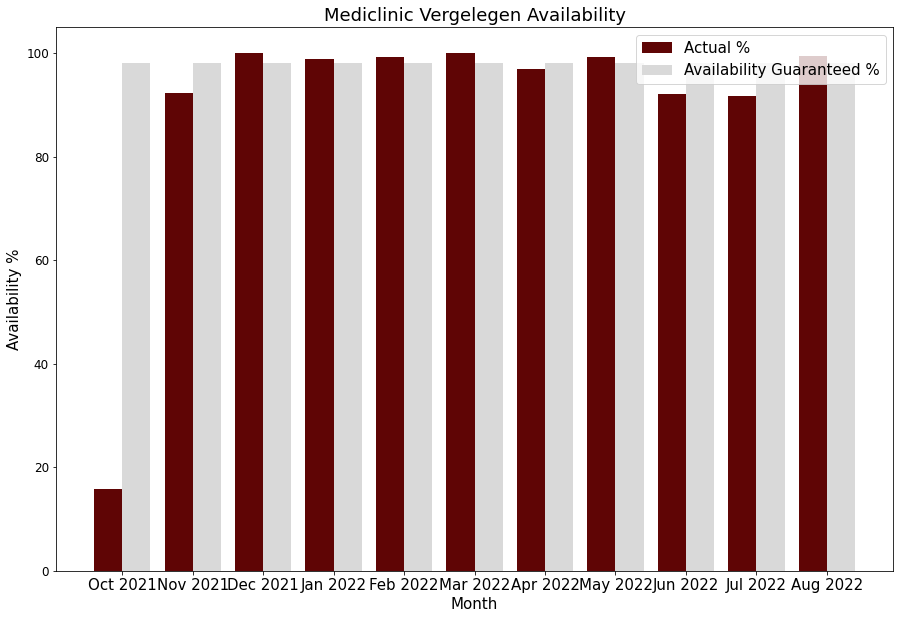

In [129]:
availability ('Vergelegen','Verg_Availability_(%)' ,'Ver_ Availability', 8, 5)

'Mediclinic Vergelegen Perfomance Ratio.jpg'

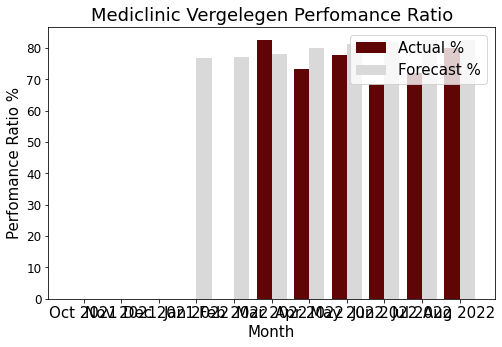

In [121]:
PR('Vergelegen', 'Verg_PR_(%)', 'Verg_PRP50',8,5)

n order to create this example plot (who's dimensions are {{"{}x{}".format(*foo.shape)}}):

{{example_heatmap}}

I did the computation in hidden cells, saved the results, and displayed those results in this Markdown cells using the Python Markdown Jupyter Notebook extension.

In [122]:
import tempfile, subprocess

def nbconvert(notebook, to='html', path_to_python_markdown=None):
    '''Execute a system call to nbconvert
    
    If python-markdown is not on you PYTHONPATH, provide the path to the nbextension as an argument.
    '''
    
    if path_to_python_markdown is None:
        # Guess
        path_to_python_markdown = os.path.expandvars(r"C:\Users\%USERNAME%\.jupyter\nbextensions\usability\python-markdown")
    
    with tempfile.NamedTemporaryFile() as f:
        tmpf = f.name + '.py'
    
    with open(tmpf, 'wt') as tmp:
        print("import sys", file=tmp)
        print("sys.path.append(r'{}')".format(path_to_python_markdown), file=tmp)
        print("c=get_config()", file=tmp)
        print("c.NbConvertApp.notebooks = ['{}']".format(notebook), file=tmp)
        if os.path.exists(path_to_python_markdown):
            print("c.Exporter.preprocessors = [ 'pymdpreprocessor.PyMarkdownPreprocessor' ]", file=tmp)
        else:
            print("Could not find python-markdown extension - simple markdown formatting will be used.")
        
    cmd = 'jupyter nbconvert --config "{}" --to {} --reveal-prefix="http://cdn.jsdelivr.net/reveal.js/2.5.0"'.format(tmpf, to)
    print(subprocess.check_output(cmd, stderr=subprocess.STDOUT).decode())
    
    os.remove(tmpf)
    

In [123]:
import os

# Provide the name of this notebook
name = 'excel automate'

# Convert the notebook
# Be sure to save the notebook before converting to HTML
nbconvert(name + '.ipynb', to='html')

report = name + '.html'
print (report)

Could not find python-markdown extension - simple markdown formatting will be used.
[NbConvertApp] Converting notebook excel automate.ipynb to html
[NbConvertApp] Writing 838816 bytes to excel automate.html

excel automate.html


Output
GitHub uses nbviewer to render the notebook file. Thus, what you see in the gist is an almost-rendered version of the final report. To see the actual output, see here.

To see the underlying notebook, download the gist and open it with your Jupyter Notebook server.

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              11 non-null     object 
 1   Verg_Energy_(kWh)                 11 non-null     float64
 2   Verg_PR_(%)                       10 non-null     float64
 3   Verg_Irradiated_(kWh/m²)          11 non-null     float64
 4   Verg_Availability_(%)             11 non-null     float64
 5   Verg_P50_(kWh)                    11 non-null     float64
 6   Verg_estimatedPOA                 11 non-null     float64
 7   Verg_PRP50                        11 non-null     float64
 8   Mid_(kWh)2                        11 non-null     float64
 9   Mid_PR_(%)                        11 non-null     float64
 10  Mid_Irradiated_(kWh/m²)           11 non-null     float64
 11  Mid_Availability_(%)              11 non-null     float64
 12  Mid_P50_(k

In [125]:


def figureImage(template,figName, measure):
    
     #Import saved figure
    image = InlineImage(template,figName,Cm(measure))
    #Declare template variables
    return image 


def docTableA( name, actual, forecast):  
    
    table = []
    for i in range(0, len(df['Date'].tolist())):
        table.append({
        'Date':df['Date'].tolist()[i],
         name+'A': df[actual].tolist()[i],
         name+'F':forcast,
         name+'V':(df[actual].tolist()[i]-forecast)/forecast
    
        })
    return table

def docTable( name, actual, forecast):
   
    table = []
    for i in range(0, len(df['Date'].tolist())):
        try:
            var = round(((df[actual].tolist()[i]-df[forecast].tolist()[i])/df[forecast].tolist()[i])*100, 2)
        except ZeroDivisionError:
            var=0 
        table.append({'Date':df['Date'].tolist()[i],
         name+'A':  round(df[actual].tolist()[i],2),
         name+'F':round(df[forecast].tolist()[i],2),
         name+'V':var
            
        })
    return table
        
def variance(actual, forecast):
    try:
            var =  round(((df[actual].iloc[-1]-df[forecast].iloc[-1])/df[forecast].iloc[-1])*100, 2)
            
    except ZeroDivisionError:
            var=0 
    return var
    
def docRender():
  
    template = DocxTemplate('Moshesh_report.docx')
    context= {
        'VERP':round(df['Verg_Energy_(kWh)'].iloc[-1],2),
        'VERI':round(df['Verg_Irradiated_(kWh/m²)'].iloc[-1],2),
        'VERPR':round(df['Verg_PR_(%)'].iloc[-1],2),
        'VERA':round(df['Verg_Availability_(%)'].iloc[-1],2),
        'VERPV':variance('Verg_Energy_(kWh)','Verg_P50_(kWh)'),
        'VERIV':variance('Verg_Irradiated_(kWh/m²)','Verg_estimatedPOA'),
        'VERAV':variance('Verg_Availability_(%)', 'Ver_ Availability'),
        'VERPRV':variance('Verg_PR_(%)', 'Verg_PRP50'),
        
        'DURP':round(df['Dur_Energy_produced_(kWh)'].iloc[-1],2),
        'DURI':round(df['Dur_Energy_Irradiated_(kWh/m²)'].iloc[-1],2),
        'DURPR':round(df['Dur_PR_(%)'].iloc[-1],2),
        'DURA':round(df['Dur_Availability_(%)'].iloc[-1],2),
        'DURPV':variance('Dur_Energy_produced_(kWh)','Dur_P50_(kWh)'),
        'DURIV':variance('Dur_Energy_Irradiated_(kWh/m²)','Dur_estimatedPOA'),
        'DURAV':variance('Dur_Availability_(%)', 'Dur_Availability'),
        'DURPRV':variance('Dur_PR_(%)', 'Dur_PRP50'),

        'MIDP':round(df['Mid_(kWh)2'].iloc[-1],2),
        'MIDI':round(df['Mid_Irradiated_(kWh/m²)'].iloc[-1],2),
        'MIDPR':round(df['Mid_PR_(%)'].iloc[-1],2),
        'MIDA':round(df['Mid_Availability_(%)'].iloc[-1],2),
        'MIDPV':variance('Mid_(kWh)2','Mid_P50_(kWh)'),
        'MIDIV':variance('Mid_Irradiated_(kWh/m²)','Mid_estimatedPOA'),
        'MIDAV':variance('Mid_Availability_(%)', 'Ver_ Availability'),
        'MIDPRV':variance('Mid_PR_(%)', 'Mid_PRP50'),
        
        'HERP':round(df['Her_Energy_produced_(kWh)'].iloc[-1],2),
        'HERI':round(df['Her_Energy_Irradiated_(kWh/m²)'].iloc[-1],2),
        'HERPR':round(df['Her_PR_(%)'].iloc[-1],2),
        'HERA':round(df['Her_Availability_(%)'].iloc[-1],2),
        'HERPV':variance('Her_Energy_produced_(kWh)','Her_P50_(kWh)'),
        'HERIV':variance('Her_Energy_Irradiated_(kWh/m²)','Her_estimatedPOA'),
        'HERAV':variance('Her_Availability_(%)','Her_ Availability'),
        'HERPRV':variance('Her_PR_(%)', 'Her_PRP50'),
            
        'HIGP':round(df['Verg_Energy_(kWh)'].iloc[-1],2),
        'HIGI':round(df['Verg_Irradiated_(kWh/m²)'].iloc[-1],2),
        'HIGPR':round(df['Verg_PR_(%)'].iloc[-1],2),
        'HIGA':round(df['Verg_Availability_(%)'].iloc[-1],2),
        'HIGPV':variance('Hig_Energy_produced_(kWh)2','Hig_P50_(kWh)'),
        'HIGIV':variance('Hig_Energy_Irradiated_(kWh/m²)','Hig_estimatedPOA'),
        'HIGAV':variance('Her_Availability_(%)', 'Hig_Availability'),
        'HIGPRV':variance('Hig_PR_(%)', 'Hig_PRP50'),
        
        'title': 'Automated Report',
        'day': datetime.datetime.now().strftime('%d'),
        'month': datetime.datetime.now().strftime('%b'),
        'year': datetime.datetime.now().strftime('%Y'),
        'VERPtable_contents': docTable('VERP', 'Verg_Energy_(kWh)','Verg_P50_(kWh)'),
        'VERItable_contents': docTable('VERI', 'Verg_Irradiated_(kWh/m²)','Verg_estimatedPOA'),
        'VERPRtable_contents': docTable('VERPR', 'Verg_PR_(%)', 'Verg_PRP50'),
        'VERAtable_contents': docTable('VERA', 'Verg_Availability_(%)', 'Ver_ Availability'),
        'VERPImage':figureImage(template,production('Vergelegen','Verg_Energy_(kWh)','Verg_P50_(kWh)',8,5),12),
        'VERIImage':figureImage(template,irradiation('Vergelegen','Verg_Irradiated_(kWh/m²)','Verg_estimatedPOA',8,5),8),
        'VERAImage':figureImage(template,availability('Vergelegen','Verg_Availability_(%)','Ver_ Availability',8,5),8),
        'VERPRImage':figureImage(template,PR('Vergelegen', 'Verg_PR_(%)', 'Verg_PRP50',8,5),8),
        
        'DURPtable_contents': docTable('DURP', 'Dur_Energy_produced_(kWh)','Dur_P50_(kWh)'),
        'DURItable_contents': docTable('DURI', 'Dur_Energy_Irradiated_(kWh/m²)','Dur_estimatedPOA'),
        'DURPRtable_contents': docTable('DURPR', 'Dur_PR_(%)', 'Dur_PRP50'),
        'DURAtable_contents': docTable('DURA', 'Dur_Availability_(%)', 'Dur_Availability'),
        'DURPImage':figureImage(template,production('Durbanville','Dur_Energy_produced_(kWh)','Dur_P50_(kWh)',8,5),12),
        'DURIImage':figureImage(template,irradiation('Durbanville','Dur_Energy_Irradiated_(kWh/m²)','Dur_estimatedPOA',8,5),8),
        'DURAImage':figureImage(template,availability('Durbanville','Dur_Availability_(%)', 'Dur_Availability',8,5),8),
        'DURPRImage':figureImage(template,PR('Durbanville', 'Dur_PR_(%)', 'Dur_PRP50',8,5),8),
        
        'MIDPtable_contents': docTable('MIDP', 'Mid_(kWh)2','Mid_P50_(kWh)'),
        'MIDItable_contents': docTable('MIDI', 'Mid_Irradiated_(kWh/m²)','Mid_estimatedPOA'),
        'MIDPRtable_contents': docTable('MIDPR', 'Mid_PR_(%)', 'Mid_PRP50'),
        'MIDAtable_contents': docTable('MIDA', 'Mid_Availability_(%)','Ver_ Availability'),
        'MIDPImage':figureImage(template,production('Midstream','Mid_(kWh)2','Mid_P50_(kWh)',8,5),10),
        'MIDIImage':figureImage(template,irradiation('Midstream','Mid_Irradiated_(kWh/m²)','Mid_estimatedPOA',8,5),8),
        'MIDAImage':figureImage(template,availability('Midstream','Mid_Availability_(%)', 'Ver_ Availability',8,5),8),
        'MIDPRImage':figureImage(template,PR('Midstreame', 'Mid_PR_(%)', 'Mid_PRP50',8,5),8),
        
        'HERPtable_contents': docTable('HERP', 'Her_Energy_produced_(kWh)','Her_P50_(kWh)'),
        'HERItable_contents': docTable('HERI', 'Hig_Energy_Irradiated_(kWh/m²)','Hig_estimatedPOA'),
        'HERPRtable_contents': docTable('HERPR', 'Her_PR_(%)', 'Her_PRP50'),
        'HERAtable_contents': docTable('HERA', 'Her_Availability_(%)','Her_ Availability'),
        'HERPImage':figureImage(template,production('Hermanus','Her_Energy_produced_(kWh)','Her_P50_(kWh)',8,5),12),
        'HERIImage':figureImage(template,irradiation('Hermanus','Her_Energy_Irradiated_(kWh/m²)','Her_estimatedPOA',8,5),8),
        'HERAImage':figureImage(template,availability('Hermanus','Her_Availability_(%)', 'Her_ Availability',8,5),8),
        'HERPRImage':figureImage(template,PR('Hermanus', 'Her_PR_(%)', 'Her_PRP50',8,5),8),
        
        'HIGPtable_contents': docTable('HIGP', 'Hig_Energy_produced_(kWh)2','Hig_P50_(kWh)'),
        'HIGItable_contents': docTable('HIGI', 'Hig_Energy_Irradiated_(kWh/m²)','Hig_estimatedPOA'),
        'HIGPRtable_contents': docTable('HIGPR', 'Hig_PR_(%)', 'Hig_PRP50'),
        'HIGAtable_contents': docTable('HIGA', 'Hig_Availability_(%)','Her_ Availability'),
        'HIGPImage':figureImage(template,production('Highveld','Hig_Energy_produced_(kWh)2','Hig_P50_(kWh)',8,5),12),
        'HIGIImage':figureImage(template,irradiation('Highveld','Hig_Energy_Irradiated_(kWh/m²)','Hig_estimatedPOA',8,5),8),
        'HIGAImage':figureImage(template,availability('Highveld','Her_Availability_(%)', 'Hig_Availability',8,5),8),
        'HIGPRImage':figureImage(template,PR('Highveld', 'Hig_PR_(%)', 'Hig_PRP50',8,5),12),
        'Revenue':figureImage(template, revenue(8,5),15),
                                }   

    
    #Render automated report
    template.render(context)
    template.save('Automated_report1.docx')
    print( 'report generated')

    
    

PermissionError: [Errno 13] Permission denied: 'Automated_report1.docx'

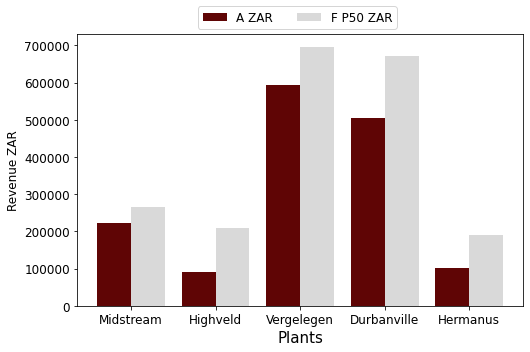

In [130]:
docRender()
import os
os.startfile('Automated_report1.docx')